In [3]:
import os
import pandas as pd

file_path = r"C:\Users\Aaryan\Documents\Road_Accident"
file_name = "Detective Challenge - Data.xlsx"
sheet_name = "Sheet1"

full_file_path = os.path.join(file_path, file_name)

# Check if file exists before reading
if os.path.exists(full_file_path):
    df = pd.read_excel(full_file_path, sheet_name=sheet_name)
    print("File is converted to Dataframe") # Print DataFrame
else:
    print("File does not exist")

File is converted to Dataframe


In [4]:
#handling missing values
df.columns=df.columns.str.lower()
df.rename(columns={'accident date':'accident_date'},inplace=True)
columns_to_fill = ['carriageway_hazards','road_surface_conditions','road_type','weather_conditions']
df[columns_to_fill] = df[columns_to_fill].fillna("details not available")

#handling duplicate or incorrect values
df['junction_control'] = df['junction_control'].replace("Auto traffic sigl","Auto traffic signal")
df['accident_severity'] =df['accident_severity'].replace("Fetal","Fatal")

In [5]:
import numpy as np

# 1. light condition group
df['light_conditions_group'] = np.where(
    df['light_conditions'].str.contains("Day", case=False, na=False),
    "Day",
    np.where(
        df['light_conditions'].str.contains("Dark", case=False, na=False),
        "Dark",
        "Unknown"
    )
)

# 2. weather condition group
fine_condition = ['Fine no high winds', 'Fine + high winds']
df['weather_conditions_group'] = np.where(
    df['weather_conditions'].isin(fine_condition),
    "Fine condition",
    "Other condition"
)


In [6]:
conditions = [
    df['vehicle_type'].str.contains('car|Taxi/Private hire car',case= False,na = False),
    df['vehicle_type'].str.contains('Motorcycle|Cycle',case= False,na = False),
    df['vehicle_type'].str.contains('Bus|coach |Minibus',case= False,na = False),
    df['vehicle_type'].str.contains('Van|Goods|Agricultural',case= False,na = False)
]
choices = ['car','Motorcycle','Bus','Heavy Vehicles']
df['vehicle_type_group'] = np.select(conditions,choices,default='Others')

In [9]:
import pandas as pd

# Create the pivot table
pivot_table_light_condition = pd.pivot_table(
    df,
    index=['light_conditions_group'],
    values=['accident_index', 'number_of_casualties'],
    aggfunc={'accident_index': 'count', 'number_of_casualties': 'sum'},
    fill_value=0
)

# Rename columns for clarity
pivot_table_light_condition.rename(
    columns={
        'accident_index': 'number_of_accidents',
        'number_of_casualties': 'Total_casualities'
    },
    inplace=True
)

# View the pivot table
pivot_table_light_condition

,number_of_accidents,Total_casualities
light_conditions_group,,
Dark,80687,112920
Day,227286,304963


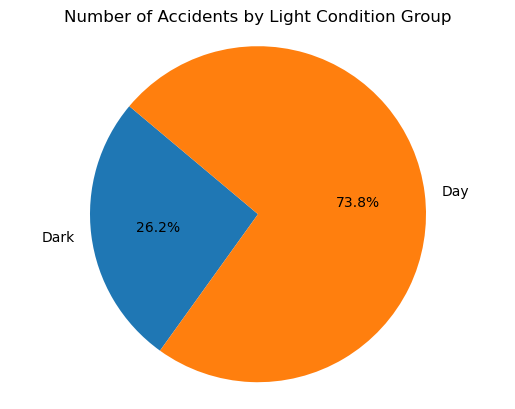

In [124]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
labels = pivot_table_light_condition.index
sizes = pivot_table_light_condition['number_of_accidents']

# Corrected autopct formatting
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Number of Accidents by Light Condition Group')
plt.show()


In [145]:
df['Year'] =df['accident_date'].dt.year
year_casualties = df.groupby('Year')['number_of_casualties'].sum().reset_index()
year_casualties['yoy_percentage'] = year_casualties['number_of_casualties'].diff()
year_casualties.columns = ['year','total_casualties','year_difference']
year_casualties

,year,total_casualties,year_difference
0,2021,222146,NaN
1,2022,195737,-26409.0


In [149]:
year_casualties['yoy_percentage'] = (
    (year_casualties['total_casualties'] - year_casualties['total_casualties'].shift(1)) 
    / year_casualties['total_casualties'].shift(1)
) * 100


In [151]:
year_casualties

,year,total_casualties,year_difference,yoy_percentage
0,2021,222146,NaN,NaN
1,2022,195737,-26409.0,-11.888128


C:\Users\Aaryan\AppData\Local\Temp\ipykernel_31196\1428177091.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='total_casualties', data=year_casualties, palette='viridis')


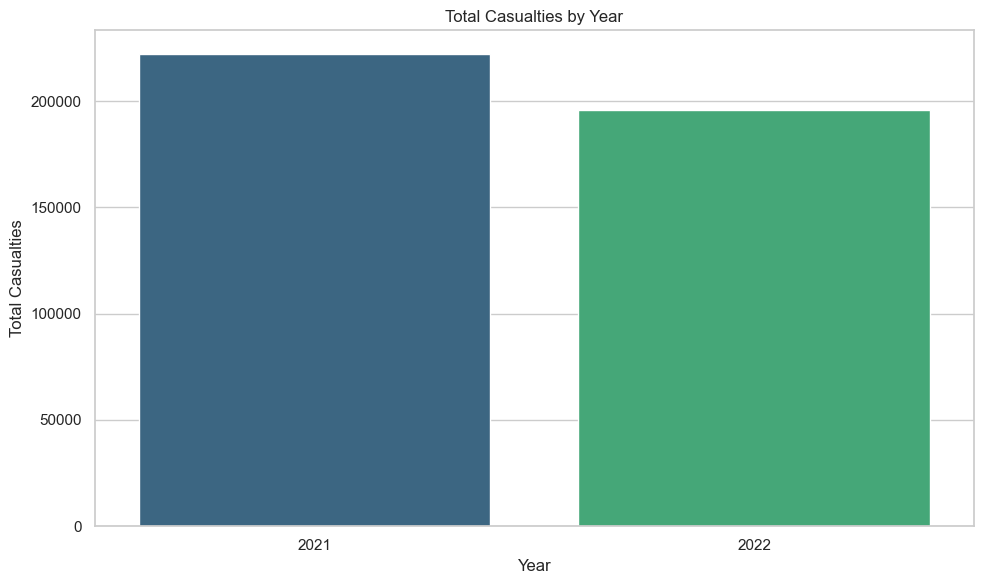

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create the bar plot for total casualties
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='total_casualties', data=year_casualties, palette='viridis')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Casualties')
plt.title('Total Casualties by Year')

# Show the plot
plt.tight_layout()
plt.show()


In [157]:
# Grouping by weather conditions and creating the pivot table
pivot_table_weather_conditions = pd.pivot_table(
    df,
    index=['weather_conditions'],
    values=['accident_index', 'number_of_casualties'],
    aggfunc={'accident_index': 'count', 'number_of_casualties': 'sum'},
    fill_value=0
)

# Rename columns for clarity
pivot_table_weather_conditions.rename(
    columns={
        'accident_index': 'number_of_accidents',
        'number_of_casualties': 'Total_casualties'
    },
    inplace=True
)

# View the pivot table
pivot_table_weather_conditions


,number_of_accidents,Total_casualties
weather_conditions,,
Fine + high winds,3148,4339
Fine no high winds,244496,330311
Fog or mist,1690,2410
Other,8802,11965
Raining + high winds,3526,4936
Raining no high winds,34877,49082
Snowing + high winds,538,763
Snowing no high winds,4839,6486
details not available,6057,7591


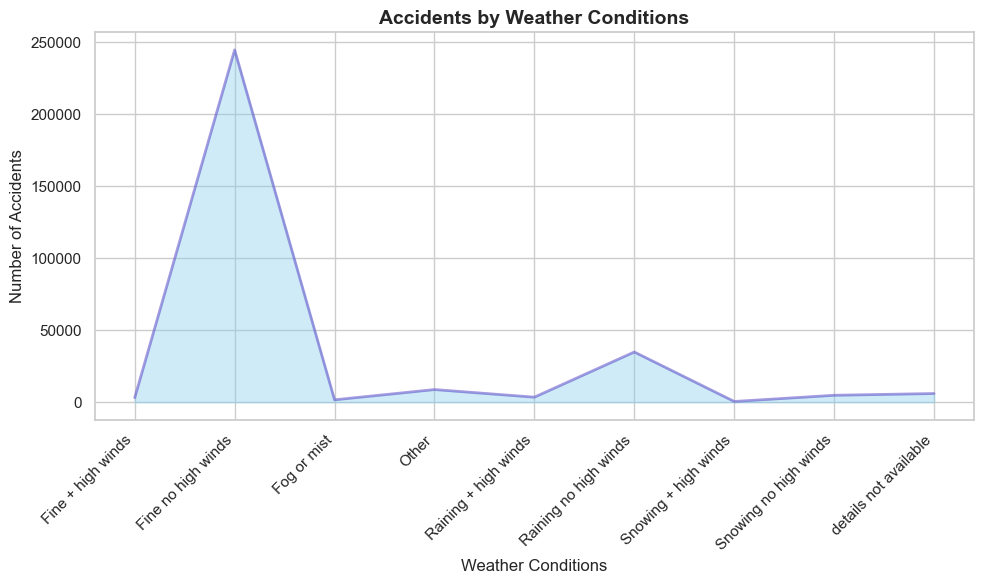

In [171]:
import matplotlib.pyplot as plt

# Prepare the data
sizes = pivot_table_weather_conditions['number_of_accidents']
labels = pivot_table_weather_conditions.index

# Plotting the area chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the area chart
ax.fill_between(labels, sizes, color='skyblue', alpha=0.4)

# Add a line on top of the area to highlight the boundaries
ax.plot(labels, sizes, color='Slateblue', alpha=0.6, linewidth=2)

# Adding titles and labels
ax.set_title('Accidents by Weather Conditions', fontsize=14, weight='bold')
ax.set_xlabel('Weather Conditions', fontsize=12)
ax.set_ylabel('Number of Accidents', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


In [161]:
# Grouping by accident severity
pivot_table_severity = pd.pivot_table(
    df,
    index=['accident_severity'],
    values=['accident_index'],
    aggfunc={'accident_index': 'count'},
    fill_value=0
)

# Rename column for clarity
pivot_table_severity.rename(
    columns={'accident_index': 'number_of_accidents'},
    inplace=True
)

# View the pivot table
pivot_table_severity


,number_of_accidents
accident_severity,
Fatal,3953
Serious,40740
Slight,263280


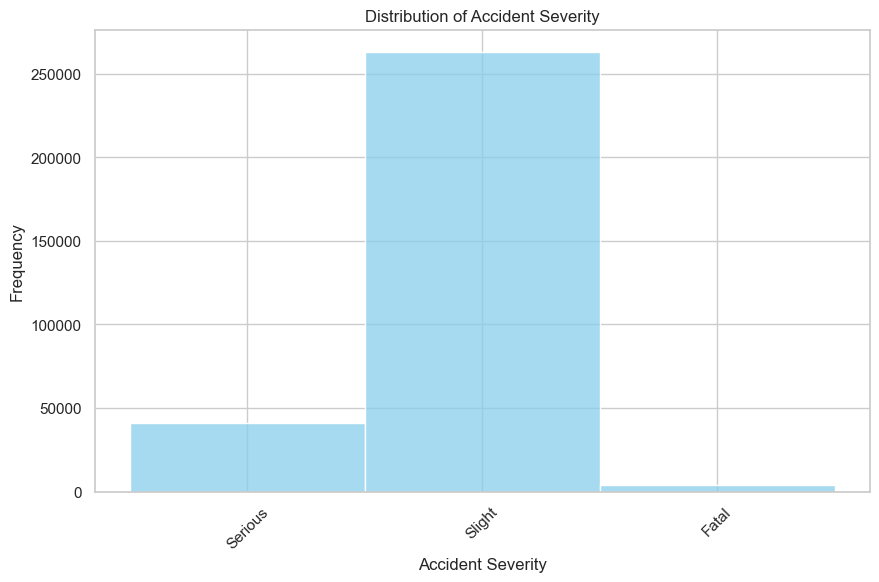

In [163]:
# Plotting the histogram for Accident Severity
plt.figure(figsize=(10, 6))
sns.histplot(df['accident_severity'], kde=False, bins=10, color='skyblue')

# Add labels and title
plt.xlabel('Accident Severity')
plt.ylabel('Frequency')
plt.title('Distribution of Accident Severity')
plt.xticks(rotation=45)
plt.show()


In [165]:
# Grouping by road surface conditions and creating the pivot table
pivot_table_surface_conditions = pd.pivot_table(
    df,
    index=['road_surface_conditions', 'Year'],
    values=['number_of_casualties'],
    aggfunc={'number_of_casualties': 'sum'},
    fill_value=0
)

# Rename columns for clarity
pivot_table_surface_conditions.rename(
    columns={'number_of_casualties': 'Total_casualties'},
    inplace=True
)

# View the pivot table
pivot_table_surface_conditions


Total_casualties
road_surface_conditions Year                  
Dry                     2021            147469
                        2022            131976
Flood over 3cm. deep    2021               386
                        2022               178
Frost or ice            2021              7116
                        2022              9190
Snow                    2021              2447
                        2022              4028
Wet or damp             2021             64534
                        2022             50163
details not available   2021               194
                        2022               202

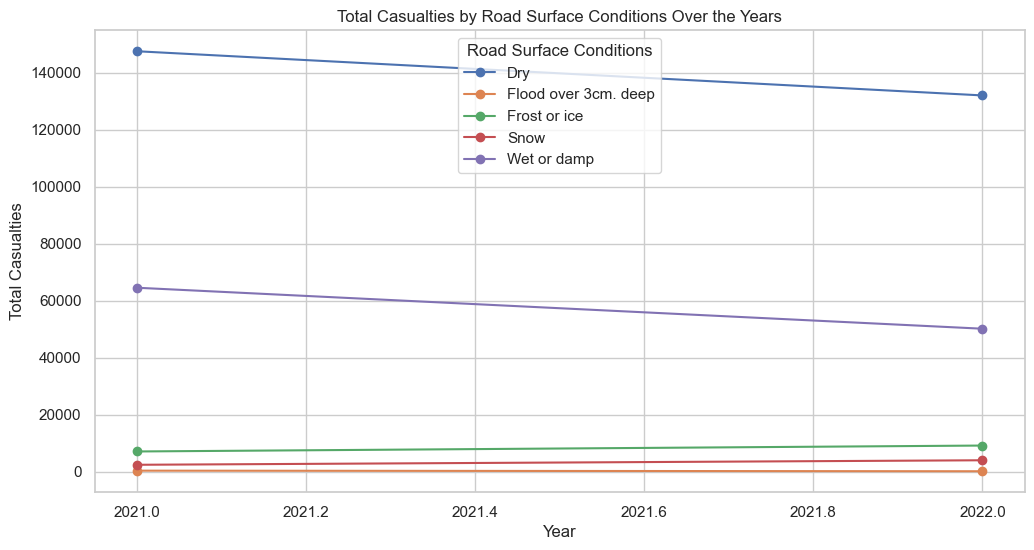

In [167]:
# Plotting the line chart for Road Surface Conditions
plt.figure(figsize=(12, 6))

# Filter the data for top road surface conditions
top_conditions = pivot_table_surface_conditions['Total_casualties'].unstack().head(5).T
top_conditions.plot(kind='line', marker='o', ax=plt.gca())

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Casualties')
plt.title('Total Casualties by Road Surface Conditions Over the Years')
plt.legend(title="Road Surface Conditions")
plt.grid(True)
plt.show()


In [16]:
df.columns

Index(['accident_index', 'accident_date', 'day_of_week', 'junction_control',
       'junction_detail', 'accident_severity', 'latitude', 'light_conditions',
       'local_authority_(district)', 'carriageway_hazards', 'longitude',
       'number_of_casualties', 'number_of_vehicles', 'police_force',
       'road_surface_conditions', 'road_type', 'speed_limit', 'time',
       'urban_or_rural_area', 'weather_conditions', 'vehicle_type',
       'light_conditions_group', 'weather_conditions_group',
       'vehicle_type_group', 'Year'],
      dtype='object')

In [38]:
df['vehicle_type_group'].unique()

array(['car', 'Motorcycle', 'Heavy Vehicles', 'Bus', 'Others'],
      dtype=object)

In [39]:
df['weather_conditions'].unique()

array(['Fine no high winds', 'Other', 'Raining no high winds',
       'Snowing no high winds', 'Fine + high winds',
       'Raining + high winds', 'details not available',
       'Snowing + high winds', 'Fog or mist'], dtype=object)

In [40]:
df['vehicle_type'].unique()

array(['Car', 'Taxi/Private hire car', 'Motorcycle over 500cc',
       'Van / Goods 3.5 tonnes mgw or under',
       'Goods over 3.5t. and under 7.5t', 'Motorcycle 125cc and under',
       'Motorcycle 50cc and under',
       'Bus or coach (17 or more pass seats)',
       'Goods 7.5 tonnes mgw and over', 'Other vehicle',
       'Motorcycle over 125cc and up to 500cc', 'Agricultural vehicle',
       'Minibus (8 - 16 passenger seats)', 'Pedal cycle', 'Ridden horse'],
      dtype=object)

In [125]:
df.columns

Index(['accident_index', 'accident_date', 'day_of_week', 'junction_control',
       'junction_detail', 'accident_severity', 'latitude', 'light_conditions',
       'local_authority_(district)', 'carriageway_hazards', 'longitude',
       'number_of_casualties', 'number_of_vehicles', 'police_force',
       'road_surface_conditions', 'road_type', 'speed_limit', 'time',
       'urban_or_rural_area', 'weather_conditions', 'vehicle_type',
       'light_conditions_group', 'weather_conditions_group',
       'vehicle_type_group', 'year'],
      dtype='object')

In [42]:
df

,accident_index,accident_date,day_of_week,junction_control,junction_detail,accident_severity,latitude,light_conditions,local_authority_(district),carriageway_hazards,...,road_type,speed_limit,time,urban_or_rural_area,weather_conditions,vehicle_type,light_conditions_group,weather_conditions_group,vehicle_type_group,Year
0,200901BS70001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,details not available,...,One way street,30,15:11:00,Urban,Fine no high winds,Car,Day,Fine condition,car,2021
1,200901BS70002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,details not available,...,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car,Day,Fine condition,car,2021
2,200901BS70003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,details not available,...,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car,Day,Fine condition,car,2021
3,200901BS70004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,details not available,...,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc,Day,Other condition,Motorcycle,2021
4,200901BS70005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,details not available,...,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car,Dark,Fine condition,car,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,2022-02-18,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,details not available,...,Single carriageway,60,07:00:00,Rural,Fine no high winds,Car,Day,Fine condition,car,2022
307969,201091NM01881,2022-02-21,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,details not available,...,Single carriageway,60,03:00:00,Rural,Fine no high winds,Car,Dark,Fine condition,car,2022
307970,201091NM01935,2022-02-23,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,details not available,...,Single carriageway,30,09:38:00,Rural,Fine no high winds,Car,Day,Fine condition,car,2022
307971,201091NM01964,2022-02-23,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,Highland,details not available,...,Single carriageway,60,18:25:00,Rural,Fine no high winds,Motorcycle over 500cc,Dark,Fine condition,Motorcycle,2022


In [43]:
df.head()

,accident_index,accident_date,day_of_week,junction_control,junction_detail,accident_severity,latitude,light_conditions,local_authority_(district),carriageway_hazards,...,road_type,speed_limit,time,urban_or_rural_area,weather_conditions,vehicle_type,light_conditions_group,weather_conditions_group,vehicle_type_group,Year
0,200901BS70001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,details not available,...,One way street,30,15:11:00,Urban,Fine no high winds,Car,Day,Fine condition,car,2021
1,200901BS70002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,details not available,...,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car,Day,Fine condition,car,2021
2,200901BS70003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,details not available,...,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car,Day,Fine condition,car,2021
3,200901BS70004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,details not available,...,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc,Day,Other condition,Motorcycle,2021
4,200901BS70005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,details not available,...,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car,Dark,Fine condition,car,2021


In [44]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   accident_index              307973 non-null  object        
 1   accident_date               307973 non-null  datetime64[ns]
 2   day_of_week                 307973 non-null  object        
 3   junction_control            307973 non-null  object        
 4   junction_detail             307973 non-null  object        
 5   accident_severity           307973 non-null  object        
 6   latitude                    307973 non-null  float64       
 7   light_conditions            307973 non-null  object        
 8   local_authority_(district)  307973 non-null  object        
 9   carriageway_hazards         307973 non-null  object        
 10  longitude                   307973 non-null  float64       
 11  number_of_casualties        307973 non-

accident_index                 0
accident_date                  0
day_of_week                    0
junction_control               0
junction_detail                0
accident_severity              0
latitude                       0
light_conditions               0
local_authority_(district)     0
carriageway_hazards            0
longitude                      0
number_of_casualties           0
number_of_vehicles             0
police_force                   0
road_surface_conditions        0
road_type                      0
speed_limit                    0
time                          17
urban_or_rural_area            0
weather_conditions             0
vehicle_type                   0
light_conditions_group         0
weather_conditions_group       0
vehicle_type_group             0
Year                           0
dtype: int64

In [45]:
df.columns

Index(['accident_index', 'accident_date', 'day_of_week', 'junction_control',
       'junction_detail', 'accident_severity', 'latitude', 'light_conditions',
       'local_authority_(district)', 'carriageway_hazards', 'longitude',
       'number_of_casualties', 'number_of_vehicles', 'police_force',
       'road_surface_conditions', 'road_type', 'speed_limit', 'time',
       'urban_or_rural_area', 'weather_conditions', 'vehicle_type',
       'light_conditions_group', 'weather_conditions_group',
       'vehicle_type_group', 'Year'],
      dtype='object')

In [46]:
df.columns = df.columns.str.lower()

df['junction_control'].unique()



array(['Give way or uncontrolled', 'Auto traffic signal',
       'Data missing or out of range', 'Authorised person', 'Stop sign',
       'Not at junction or within 20 metres'], dtype=object)

In [47]:
unique_values = {}

for col in df.columns:
    unique_values[col] = df[col].unique
    print(unique_values[col])

<bound method Series.unique of 0         200901BS70001
1         200901BS70002
2         200901BS70003
3         200901BS70004
4         200901BS70005
              ...      
307968    201091NM01760
307969    201091NM01881
307970    201091NM01935
307971    201091NM01964
307972    201091NM02142
Name: accident_index, Length: 307973, dtype: object>
<bound method Series.unique of 0        2021-01-01
1        2021-01-05
2        2021-01-04
3        2021-01-05
4        2021-01-06
            ...    
307968   2022-02-18
307969   2022-02-21
307970   2022-02-23
307971   2022-02-23
307972   2022-02-28
Name: accident_date, Length: 307973, dtype: datetime64[ns]>
<bound method Series.unique of 0         Thursday
1           Monday
2           Sunday
3           Monday
4          Tuesday
            ...   
307968    Thursday
307969      Sunday
307970     Tuesday
307971     Tuesday
307972      Sunday
Name: day_of_week, Length: 307973, dtype: object>
<bound method Series.unique of 0             Give w

In [69]:
import pandas as pd
import os
main_path = r''
raw_path = os.path.join(main_path,"")
file_name = 'Detective Challenger'